In [1]:
# install environment
# from setup import setup
# setup.setup_venv(venv_name='amafm')

In [1]:
# source ~/venv/amafm/Scripts/activate
%load_ext autoreload
%autoreload 2

DATA_DIR = '../experiments'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from amafm import analysis, denoise, evaluation, force, preprocessing, selection, visualization

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



c:\OneDrive - TU Wien\Studium\Master_5. Semester\Interdisciplinary Project\AM-AFM scripts\AM-AFM\amafm\igor\igor\struct.py:308: SyntaxWarning: invalid escape sequence '\s'
  """Represent a DynamicStructure field with a dynamic definition.
c:\OneDrive - TU Wien\Studium\Master_5. Semester\Interdisciplinary Project\AM-AFM scripts\AM-AFM\amafm\igor\igor\util.py:54: SyntaxWarning: "is" with 'int' literal. Did you mean "=="?
  elif spaces is 1:


# Evaluate methods

In [42]:
measurements_raw, calib_params = preprocessing.preprocess(DATA_DIR, num_files=100, scale=True, smooth=False, 
                                                          yalign='median', xalign=None)

Step 4/5: y-alignment: 100%|██████████| 101/101 [00:00<00:00, 4390.67it/s]


## Inspect data

### raw data

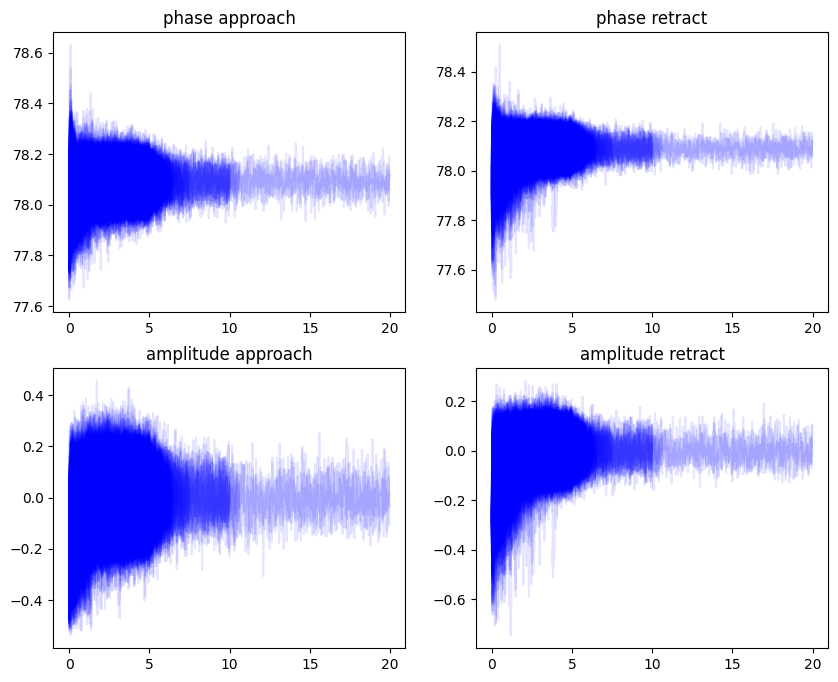

In [5]:
visualization.plot_all(measurements_raw, single_color=True, alpha=0.1)

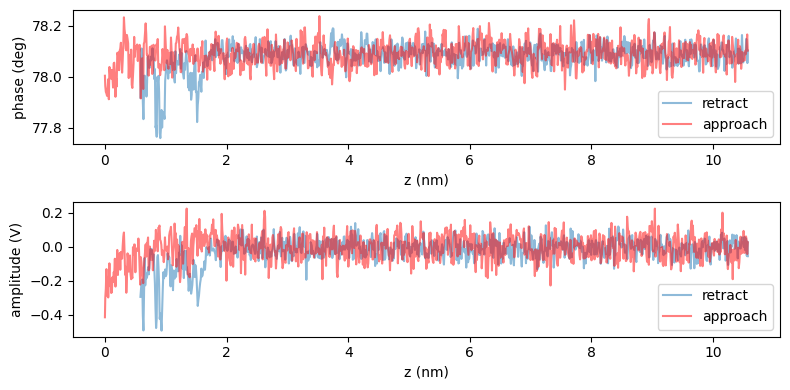

In [112]:
visualization.compare_directions(measurements_raw[5])

In [ ]:
# TODO: correlation of phase and amplitude


### preprocessed data

In [113]:
measurements, calib_params = preprocessing.preprocess(DATA_DIR, num_files=1000)

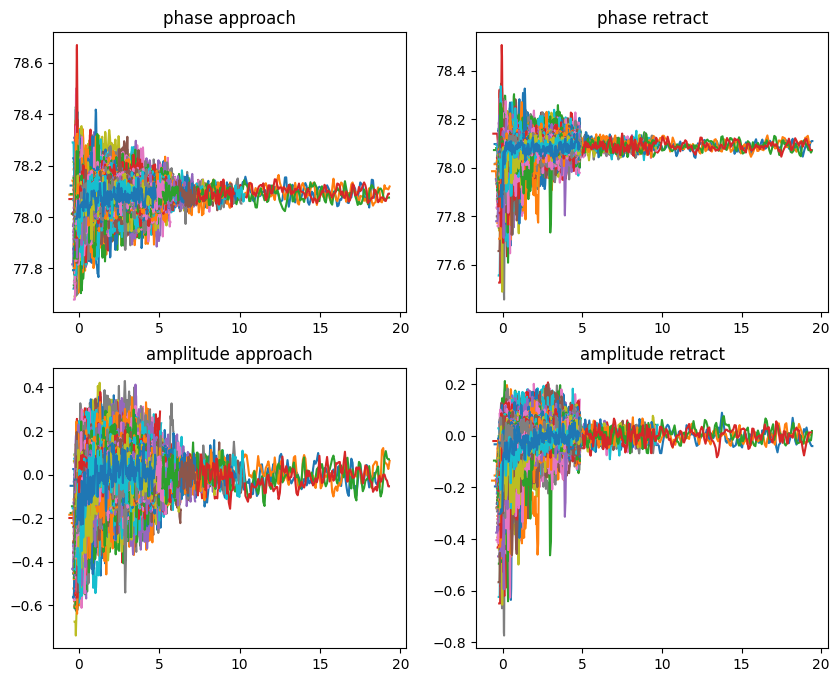

In [114]:
visualization.plot_all(measurements, single_color=False)

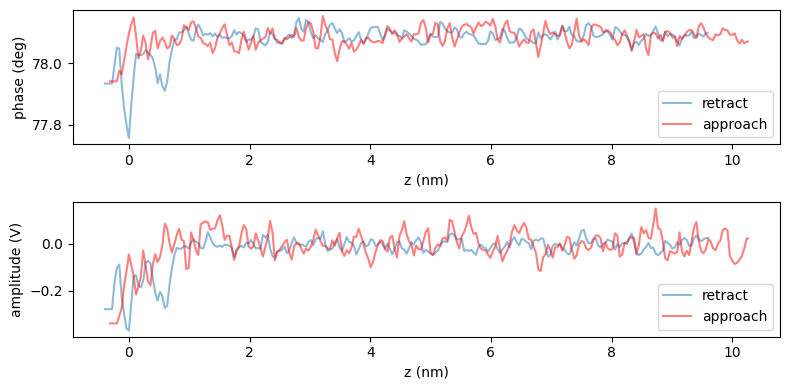

In [115]:
visualization.compare_directions(measurements[5])

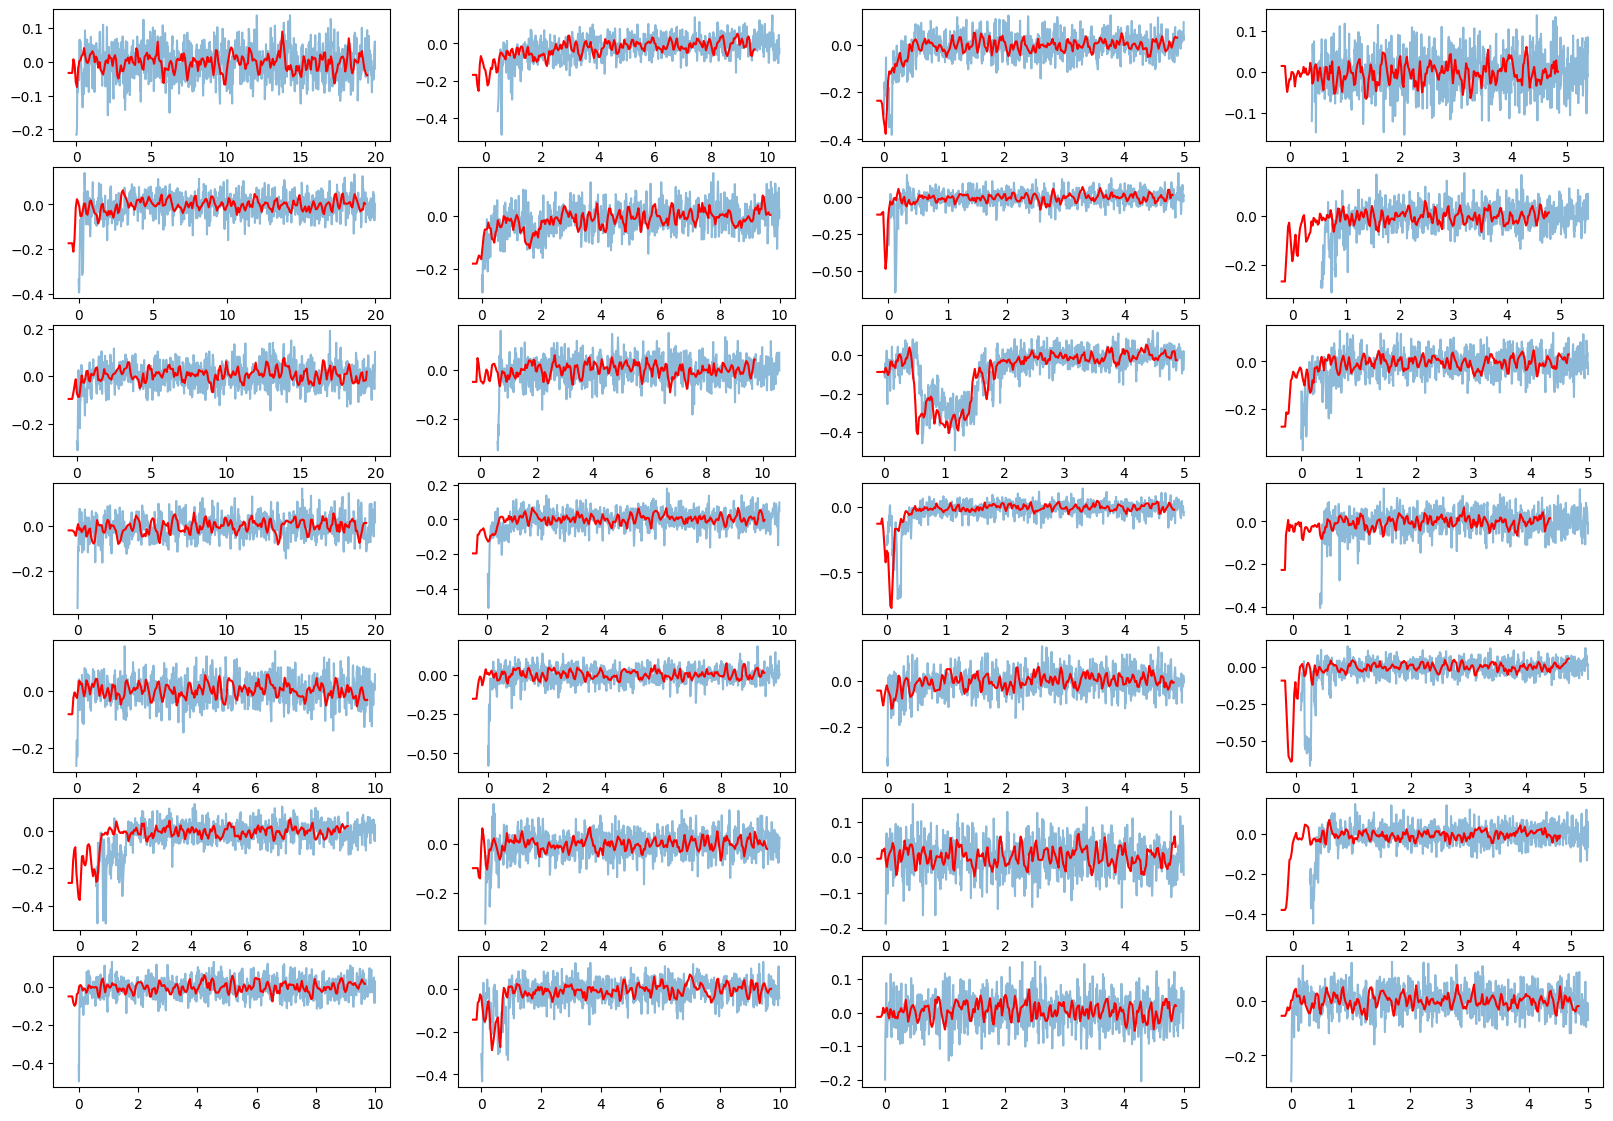

In [116]:
visualization.compare_raw_and_processed(measurements, measurements_raw)

## Denoising

In [64]:
smoothing_methods = [
    {'smooth_func': denoise.rolling_window, 'smooth_kwargs': {'agg': 'mean', 'w': 20, 's': 5}},
    {'smooth_func': denoise.rolling_window, 'smooth_kwargs': {'agg': 'median', 'w': 20, 's': 3}},
    {'smooth_func': denoise.rolling_window, 'smooth_kwargs': {'agg': 'median', 'w': 10, 's': 2}},
    {'smooth_func': denoise.savgol, 'smooth_kwargs': {'w': 20, 'p': 3}},
    {'smooth_func': denoise.savgol, 'smooth_kwargs': {'w': 50, 'p': 3}},
    {'smooth_func': denoise.gauss, 'smooth_kwargs': {'s': 6}},
    {'smooth_func': denoise.gauss, 'smooth_kwargs': {'s': 4}},
    {'smooth_func': denoise.gauss, 'smooth_kwargs': {'s': 2}},
    {'smooth_func': denoise.lowess, 'smooth_kwargs': {'frac': 0.01}},
    {'smooth_func': denoise.lowess, 'smooth_kwargs': {'frac': 0.015}},
    {'smooth_func': denoise.lowess, 'smooth_kwargs': {'frac': 0.02}},
    {'smooth_func': denoise.fft, 'smooth_kwargs': {'threshold': 0.06}},
    {'smooth_func': denoise.fft, 'smooth_kwargs': {'threshold': 0.05}},
]

measurements, calib_params = preprocessing.preprocess(DATA_DIR, num_files=100, smooth=False, yalign=None, xalign=None)
results = evaluation.evaluate_smoothing(measurements, smoothing_methods, all=False)
results

Step 2/1: Min-max-scaling: 100%|██████████| 101/101 [00:00<00:00, 22608.99it/s]


r2  \
gauss {'s': 2}                                     6.380085e-01   
lowess {'frac': 0.01}                              5.725028e-01   
lowess {'frac': 0.015}                             5.043544e-01   
gauss {'s': 4}                                     4.952828e-01   
savgol {'w': 20, 'p': 3}                           4.881208e-01   
lowess {'frac': 0.02}                              4.466914e-01   
gauss {'s': 6}                                     4.337595e-01   
savgol {'w': 50, 'p': 3}                           3.806528e-01   
rolling_window {'agg': 'median', 'w': 10, 's': 2}  3.276531e-01   
rolling_window {'agg': 'mean', 'w': 20, 's': 5}    2.847722e-01   
rolling_window {'agg': 'median', 'w': 20, 's': 3}  2.633270e-01   
fft {'threshold': 0.06}                            1.180290e-08   
fft {'threshold': 0.05}                            1.180290e-08   

                                                             snr     ccorr  \
gauss {'s': 2}                                          1.458280  0.803501   
lowess {'frac': 0.01}                                   1.471335  0.754628   
lowess {'frac': 0.015}                                  1.603864  0.705092   
gauss {'s': 4}                                          1.708663  0.701568   
savgol {'w': 20, 'p': 3}                                1.516187  0.689509   
lowess {'frac': 0.02}                                   1.746551  0.659317   
gauss {'s': 6}                                          1.881851  0.651372   
savgol {'w': 50, 'p': 3}                                1.834587  0.598567   
rolling_window {'agg': 'median', 'w': 10, 's': 2}       1.579346  0.560237   
rolling_window {'agg': 'mean', 'w': 20, 's': 5}         1.921708  0.508479   
rolling_window {'agg': 'median', 'w': 20, 's': 3}       1.918858  0.488973   
fft {'threshold': 0.06}                            627687.487624  0.017935   
fft {'threshold': 0.05}                            627687.487624  0.017935   

                                                       rmse  
gauss {'s': 2}                                     0.037687  
lowess {'frac': 0.01}                              0.041012  
lowess {'frac': 0.015}                             0.044210  
gauss {'s': 4}                                     0.044614  
savgol {'w': 20, 'p': 3}                           0.044919  
lowess {'frac': 0.02}                              0.046792  
gauss {'s': 6}                                     0.047344  
savgol {'w': 50, 'p': 3}                           0.049630  
rolling_window {'agg': 'median', 'w': 10, 's': 2}  0.051812  
rolling_window {'agg': 'mean', 'w': 20, 's': 5}    0.053693  
rolling_window {'agg': 'median', 'w': 20, 's': 3}  0.054539  
fft {'threshold': 0.06}                            0.065911  
fft {'threshold': 0.05}                            0.065911

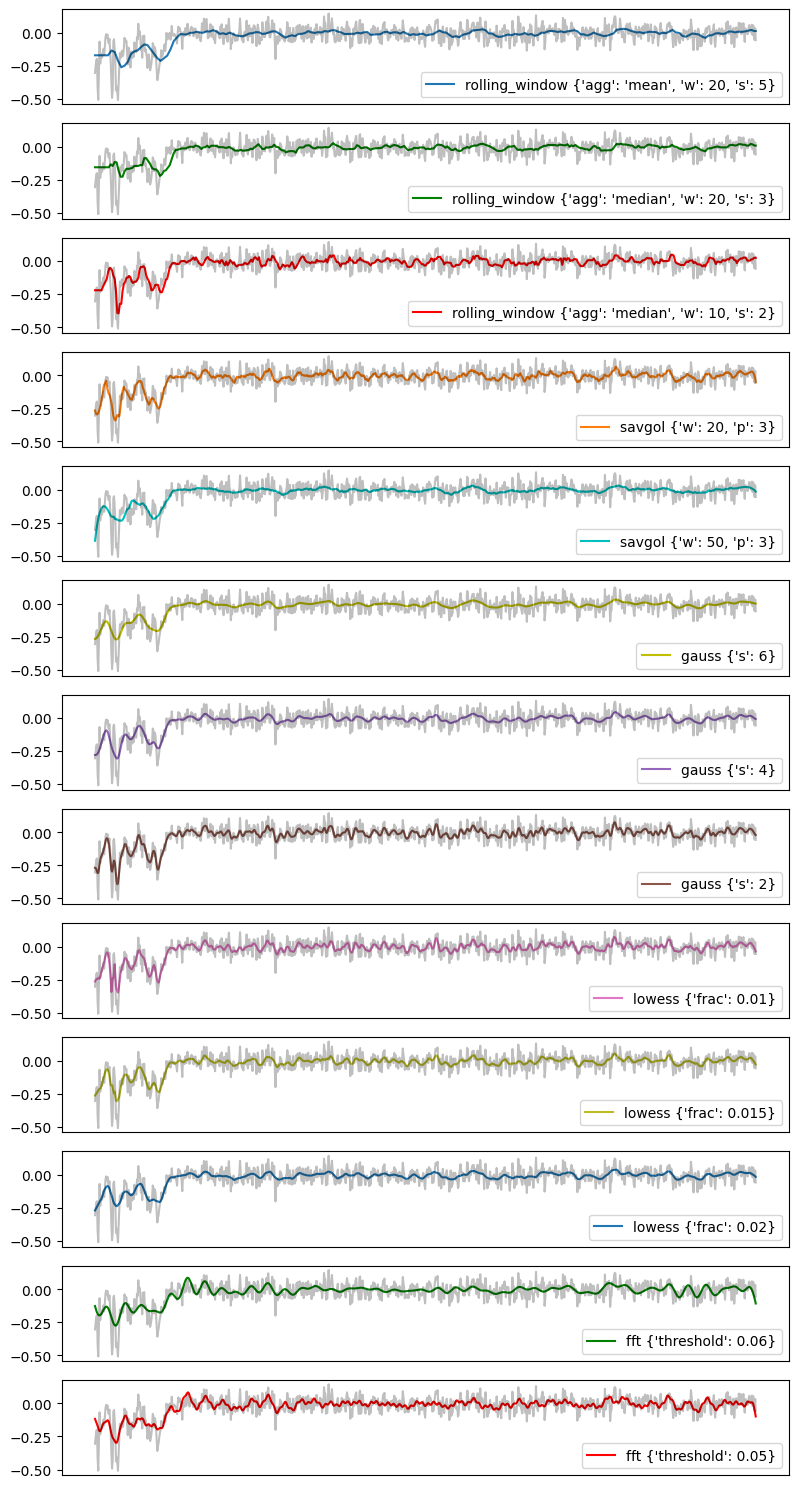

In [67]:
i = 5
visualization.compare_smoothing(measurements_raw[i], smoothing_methods)

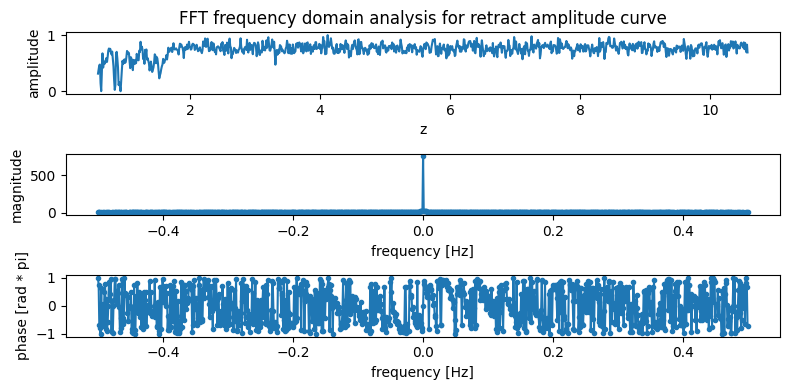

max. magnitude: 750 at frequency -0.000 Hz with phase 0.00 pi


In [127]:
# frequency Domain Analysis (FFT): compare key features

import matplotlib.pyplot as plt
import numpy as np


def fda(z, signal):
    i = 5
    S = np.fft.fftshift(np.fft.fft(signal))
    S_mag = np.abs(S)
    S_phase = np.angle(S) / np.pi

    Fs = 1
    f = np.arange(Fs/-2, Fs/2, Fs/len(z))

    fig, axs = plt.subplots(3, 1, figsize=(8,4))
    axs[0].plot(z, signal)
    axs[1].plot(f, S_mag, '.-')
    axs[2].plot(f, S_phase, '.-')
    axs[0].set_title('FFT frequency domain analysis for retract amplitude curve')
    axs[0].set_xlabel('z')
    axs[0].set_ylabel('amplitude')
    axs[1].set_xlabel('frequency [Hz]')
    axs[1].set_ylabel('magnitude')
    axs[2].set_xlabel('frequency [Hz]')
    axs[2].set_ylabel('phase [rad * pi]')
    fig.tight_layout()
    plt.show()

    print(f'max. magnitude: {S_mag.max():.3g} at frequency {round(f[np.argmax(S_mag)], 3):.3f} Hz '
        f'with phase {S_phase[np.argmax(S_mag)] / np.pi:.2f} pi')

fda(z, y)

## y-alignment

Step 3/5: Min-max-scaling: 100%|██████████| 11/11 [00:00<00:00, 10961.59it/s]


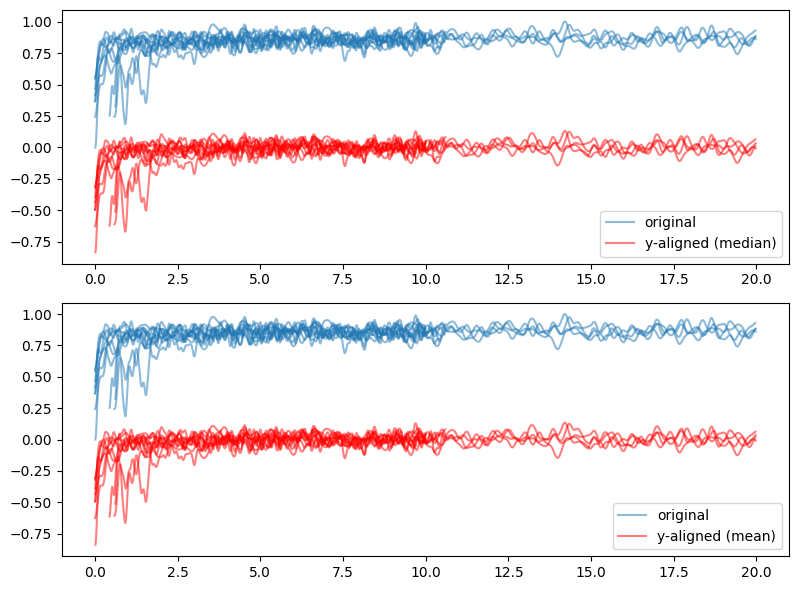

In [31]:
measurements, calib_params = preprocessing.preprocess(DATA_DIR, num_files=10, scale=True, smooth=True, 
                                                      smooth_func=denoise.gauss, smooth_kwargs={'s': 4}, 
                                                      yalign=None, xalign=None)

visualization.plot_compare_yalign(measurements, calib_params, scaled=True, signal_type='amp', direction='out', alpha=0.5)

## x-alignment

In [83]:
measurements, calib_params = preprocessing.preprocess(DATA_DIR, num_files=100, xalign=None)

Step 4/4: y-alignment: 100%|██████████| 101/101 [00:00<00:00, 5315.11it/s]


### feature extraction method

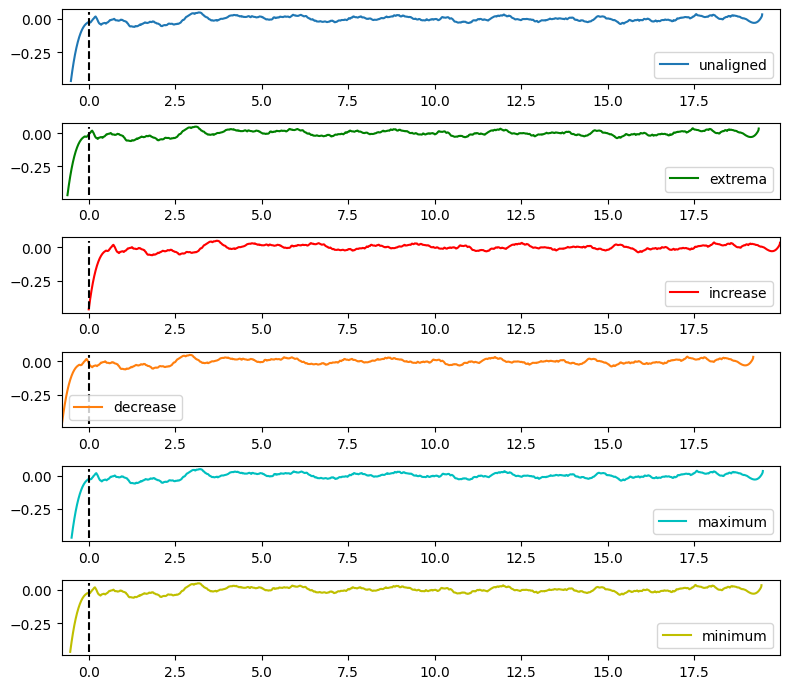

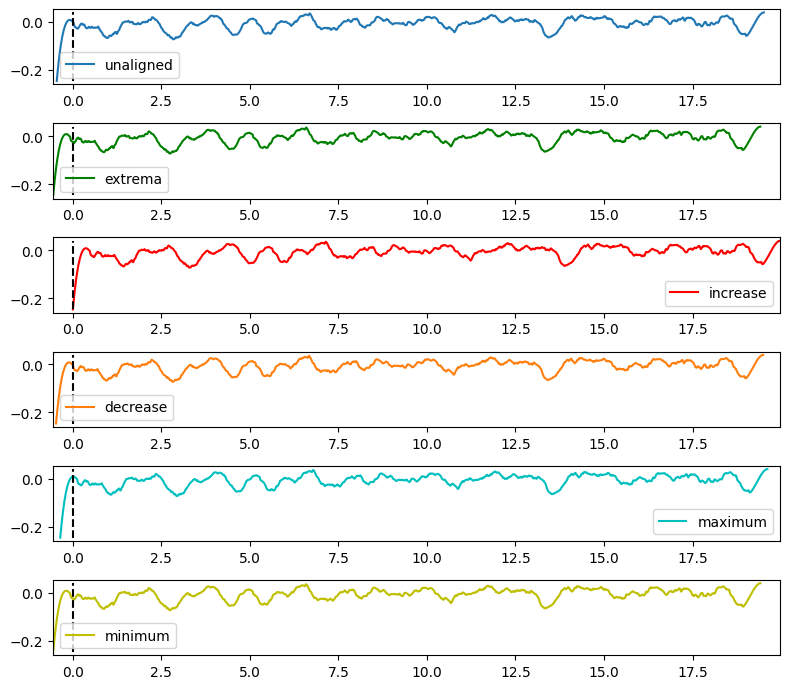

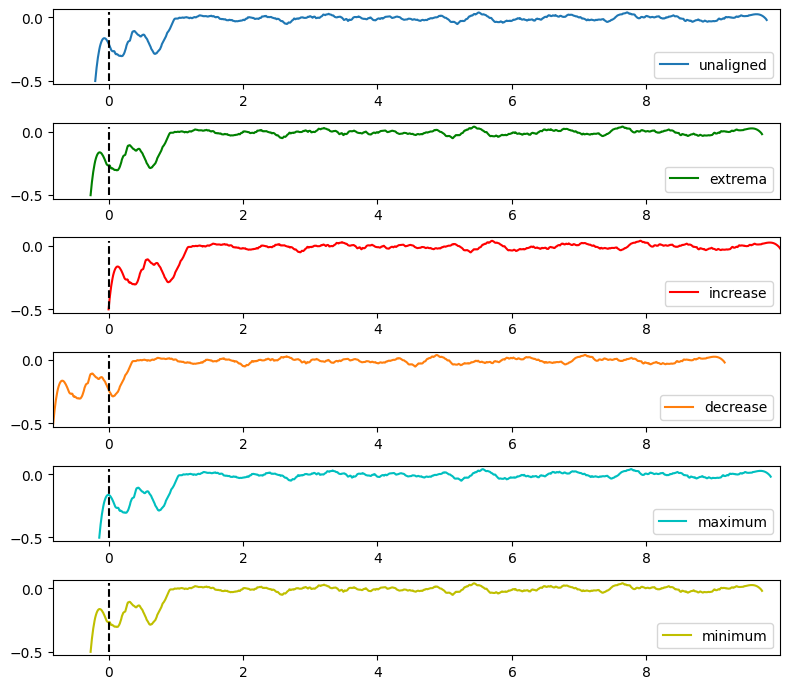

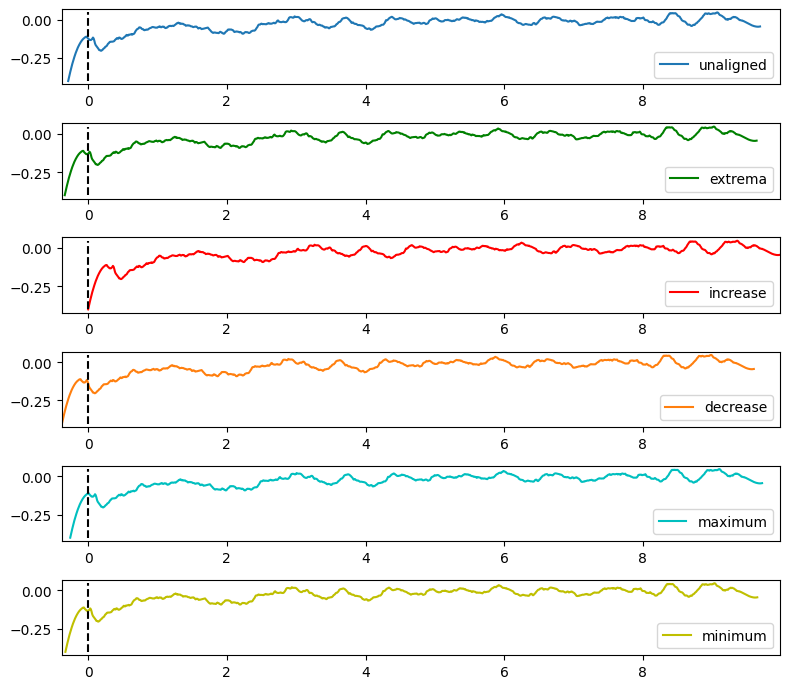

In [175]:
visualization.plot_compare_feature_xalign(measurements[1:8:2])

### dtw method

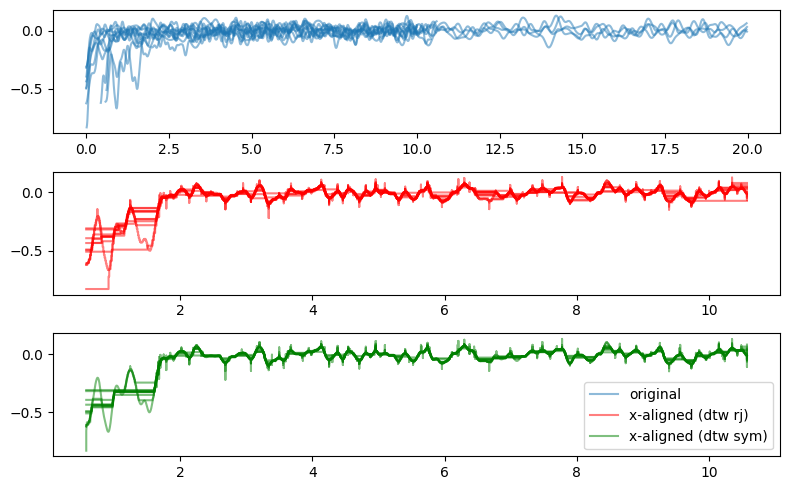

In [131]:
visualization.plot_compare_dtw_xalign(measurements, 5)

## Identify good curves

In [ ]:
# select good curves manually
!python select_experiments.py

In [5]:
# load files and preprocess curves
ideal = [10, 23, 32, 67, 117, 326, 405, 410, 450, 462, 463, 483, 515]
ideal = 410
measurements, calib_params = preprocessing.preprocess(DATA_DIR, num_files=1000)

Step 5/5: x-alignment: 100%|██████████| 1001/1001 [00:01<00:00, 636.65it/s]


### Deviation from ideal curve

In [6]:
# select n curves with smallest distance from ideal curve 
n_choose = 10
curve_type = 'amp_out'
sorted_measurements, distances, sort_idcs = selection.sort_curves_by_distance(measurements, ideal, curve_type)
selected_measurements = sorted_measurements[:n_choose]

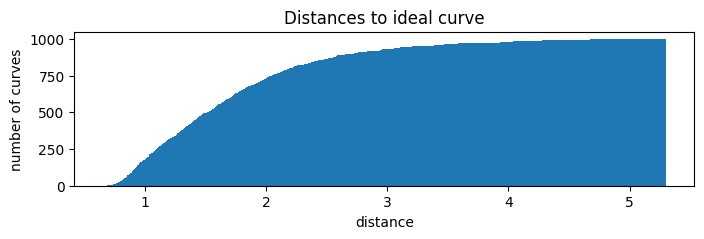

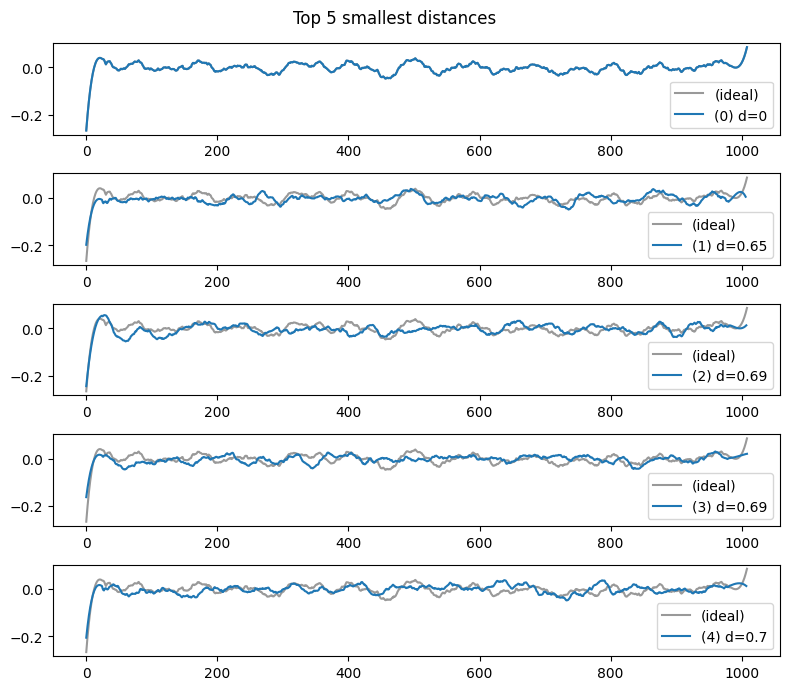

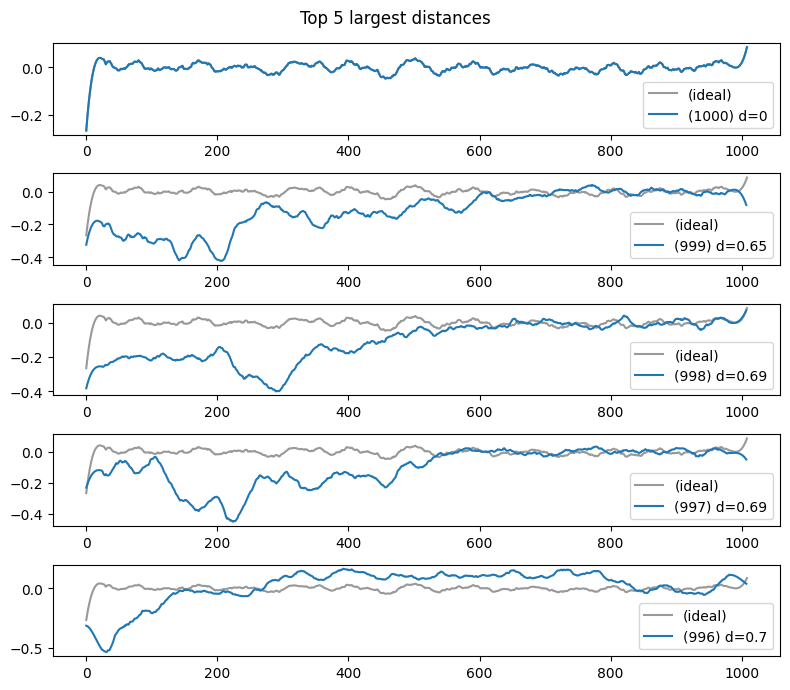

In [7]:
visualization.plot_smallest_largest_distance(distances, sorted_measurements, measurements[ideal], n=5)

### ML model

In [ ]:
from amafm import ml

MODEL_DIR = 'models'
n_files = 10

In [ ]:
# using preprocessed curves
measurements, calib_params = preprocessing.preprocess(DATA_DIR, num_files=n_files)
model_svm, model_rf, results = ml.train_curve_selection_models(measurements, curve_types='amp_out')
results

In [ ]:
# using raw curves
measurements, calib_params = preprocessing.preprocess(DATA_DIR, num_files=n_files, smooth=False, yalign=None, xalign=None)
model_svm, model_rf, results = ml.train_curve_selection_models(measurements, curve_types='amp_out')
results

## Averaging

In [4]:
measurements, calib_params = preprocessing.preprocess(DATA_DIR, num_files=100, xalign_n=1)

Step 5/5: x-alignment: 100%|██████████| 101/101 [00:00<00:00, 14433.06it/s]


In [177]:
zs = [m.z_out for m in measurements]
amps = [m.amp_out for m in measurements]
phases = [m.phase_out for m in measurements]
signals_list = [amps, phases]

# Find the index of the value in each array
indices = [np.nonzero(array == 0.0)[0][0] for array in zs]
indices

most_pos = max(indices)
most_neg = min(indices)
most_pos, most_neg

(np.int64(77), np.int64(7))

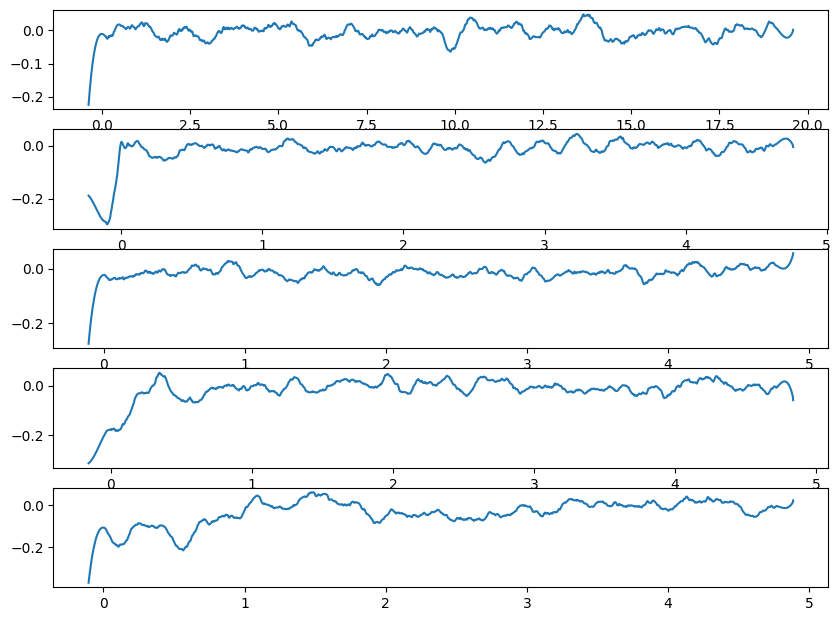

In [199]:
n = 5
fig, axs = plt.subplots(n, 1, figsize=(10, 1.5*n))
for i in range(5):
    axs[i].plot(zs[i * 15], amps[i * 15])
plt.show()

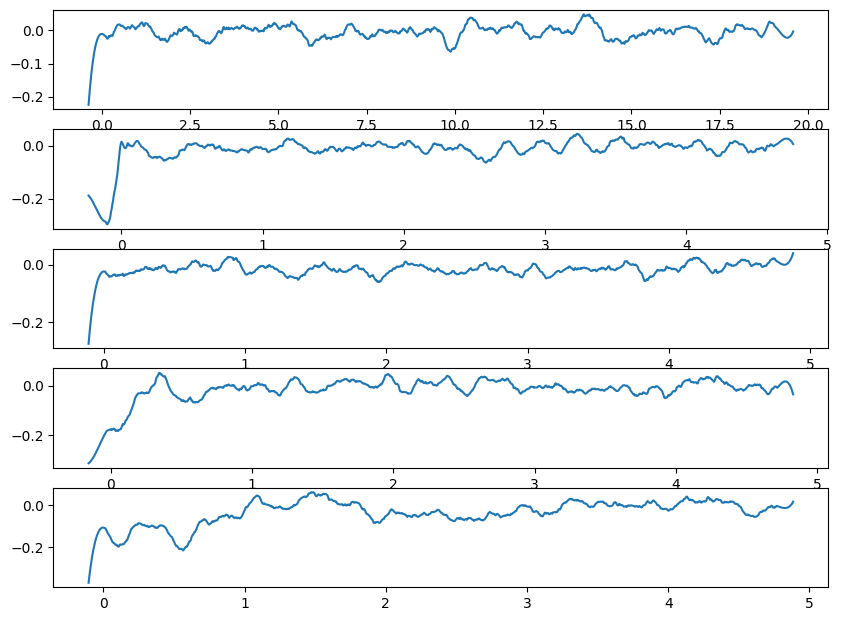

In [212]:
zs_aligned = zs
amps_aligned = amps
#zs_aligned = [z[i:] for z, i in zip(zs, indices)]
#amps_aligned = [a[i:] for a, i in zip(amps, indices)]

n = min([len(x) for x in zs_aligned])
zs_aligned = [z[:n] for z in zs_aligned]
amps_aligned = [a[:n] for a in amps_aligned]

n = 5
fig, axs = plt.subplots(n, 1, figsize=(10, 1.5*n))
for i in range(5):
    axs[i].plot(zs_aligned[i * 15], amps_aligned[i * 15])
plt.show()

In [335]:
import warnings

z_vals = np.concat(zs)
min_z, max_z = z_vals.min(), z_vals.max()
del z_vals

n_bins = 1000
bins_left = np.linspace(min_z, max_z, n_bins + 1)

zs_avs = []
amps_avs = []
with warnings.catch_warnings():
    warnings.filterwarnings('ignore', message=r'.*Mean of empty slice')
    for z, a in zip(zs, amps):
        hist = np.histogram(z, bins=bins_left)
        idcs = np.cumulative_sum(hist[0])[:-1]
        z_av = [np.nanmean(bin) for bin in np.split(z, idcs)]
        a_av = [np.nanmean(bin) for bin in np.split(a, idcs)]
        zs_avs.append(z_av)
        amps_avs.append(a_av)
    zs_av = np.nanmean(zs_avs, axis=0)
    as_av = np.nanmean(amps_avs, axis=0)

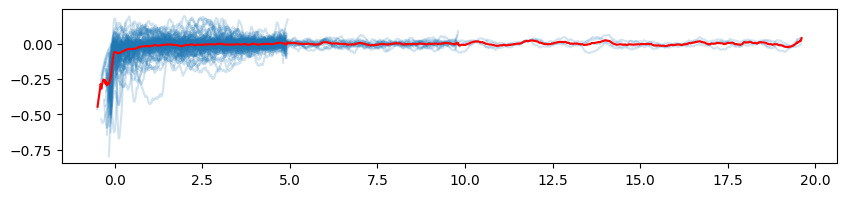

In [336]:
plt.figure(figsize=(10, 2))
for z, a in zip(zs, amps):
    plt.plot(z, a, color='tab:blue', alpha=0.2)
plt.plot(zs_av, as_av, color='r')
plt.show()

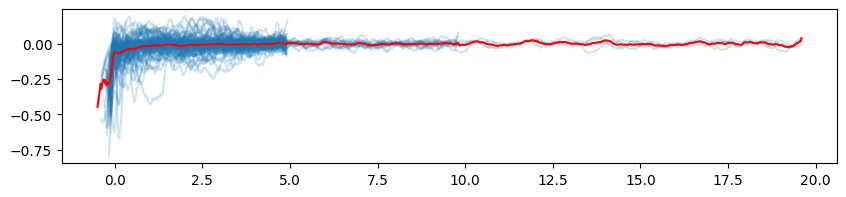

In [324]:
plt.figure(figsize=(10, 2))
for z, a in zip(zs_aligned, amps_aligned):
    plt.plot(z, a, color='tab:blue', alpha=0.2)
plt.plot(zs_av, as_av, color='r')
plt.show()

### binned averaging

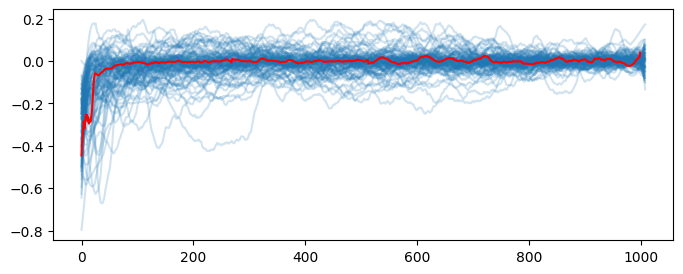

In [6]:
avrg_measurement = analysis.average_curves(measurements, n_bins=1000)
visualization.plot_averaging(avrg_measurement, measurements)

## Evaluate preprocessing

In [ ]:
from typing import Any

import pandas as pd

from amafm.preprocessing import Measurement


def evaluate_curve_average(avrg_measurement: Measurement) -> float:
    # TODO: determine accuracy of curve average
    raise NotImplementedError


def evaluate_preproc_config(results: pd.DataFrame, config: dict[str, Any], 
                            fixed_kwargs: dict[str, Any]) -> None:
    measurements, calib_params = preprocessing.preprocess(DATA_DIR, **config, **fixed_kwargs)
    avrg_measurement, aligned_measurements = analysis.average_curves(measurements, direction='out', 
                                                                     method='bin', bin_width=5)
    res = evaluate_curve_average(avrg_measurement)
    results.loc[len(results)] = [config, res]


def get_best_config(results: pd.DataFrame, by: str, ascending: bool = False) -> dict[str, Any]:
    best_res = results.sort_values(by, ascending=ascending).iloc[0]
    return best_res.config


fixed_kwargs = {'num_files': 10, 'xalign_guide_idx': 5}
smoothing_configs = [
    {'smooth_func': denoise.rolling_window, 'smooth_kwargs': {'agg': 'mean', 'w': 20, 's': 5}},
    {'smooth_func': denoise.rolling_window, 'smooth_kwargs': {'agg': 'median', 'w': 20, 's': 3}},
    {'smooth_func': denoise.rolling_window, 'smooth_kwargs': {'agg': 'median', 'w': 10, 's': 2}},
    {'smooth_func': denoise.savgol, 'smooth_kwargs': {'w': 20, 'p': 3}},
    {'smooth_func': denoise.gauss, 'smooth_kwargs': {'s': 6}},
    {'smooth_func': denoise.gauss, 'smooth_kwargs': {'s': 4}},
    {'smooth_func': denoise.gauss, 'smooth_kwargs': {'s': 2}},
    {'smooth_func': denoise.lowess, 'smooth_kwargs': {'frac': 0.01}},
    {'smooth_func': denoise.lowess, 'smooth_kwargs': {'frac': 0.015}},
    {'smooth_func': denoise.lowess, 'smooth_kwargs': {'frac': 0.02}},
    {'smooth_func': denoise.fft, 'smooth_kwargs': {'threshold': 0.07}},
    {'smooth_func': denoise.fft, 'smooth_kwargs': {'threshold': 0.06}},
]


# basic config
results = pd.DataFrame(columns=['config', 'accuracy'])
sort_by = 'accuracy'
best_config = {}
evaluate_preproc_config(results, best_config, fixed_kwargs)

# evalaute yalign
for yalign in ['mean', 'median']:
    best_config['yalign'] = yalign
    evaluate_preproc_config(results, best_config, fixed_kwargs)
best_conf = get_best_config(results, sort_by)

# evalaute xalign
for xalign in ['extrema', 'sym', 'rj']:
    best_conf['xalign'] = xalign
    evaluate_preproc_config(results, best_conf, fixed_kwargs)
best_conf = get_best_config(results, sort_by)

# evalaute scaling
for scale in [False, True]:
    best_conf['scale'] = scale
    evaluate_preproc_config(results, best_conf, fixed_kwargs)
best_conf = get_best_config(results, sort_by)

# evaluate smoothing
for sc in smoothing_configs:
    best_conf['smooth_func'] = sc['smooth_func']
    best_conf['smooth_kwargs'] = sc['smooth_kwargs']
    evaluate_preproc_config(results, best_conf, fixed_kwargs)
best_conf['smooth'] = False
evaluate_preproc_config(results, best_conf, fixed_kwargs)
best_conf = get_best_config(results, sort_by)

# evaluate xalign_guide
for gt in ['amp', 'phase']:
    best_conf['xalign_guide_type'] = gt
    evaluate_preproc_config(results, best_conf, fixed_kwargs)
best_conf = get_best_config(results, sort_by)

results.sort_values(sort_by, ascending=False)

In [ ]:
preproc_results = evaluation.evaluate_preprocessing(DATA_DIR, fixed_kwargs, smoothing_configs)
preproc_results

## Evaluate averaging methods

In [ ]:
measurements, calib_params = preprocessing.preprocess(DATA_DIR, num_files=10)

preprocessing_kwargs = {'num_files': 10, 'xalign_guide_idx': 5}
configurations = [
    {'method': 'element'},
    {'method': 'bin', 'bin_width': 3},
    {'method': 'bin', 'bin_width': 5},
    {'method': 'bin', 'bin_width': 10},
]

results = pd.DataFrame(columns=['config', 'accuracy'])
for config in configurations:
    avrg_measurement, aligned_measurements = analysis.average_curves(measurements, **config)
    res = evaluation.evaluate_curve_average(avrg_measurement)
    results.loc[len(results)] = [config, res]

results.sort_values('accuracy', ascending=False)

In [ ]:
avrg_results = evaluation.evaluate_averaging(DATA_DIR, preprocessing_kwargs, configurations)
avrg_results

## Derive force curve

In [3]:
measurements_0024_001, calib_params_0024_001 = preprocessing.preprocess(DATA_DIR, folders=['0024_001'])
measurements_0026_003, calib_params_0026_003 = preprocessing.preprocess(DATA_DIR, folders=['0026_003'])
measurements_0031_001, calib_params_0031_001 = preprocessing.preprocess(DATA_DIR, folders=['0031_001'])

Step 1/5: Loading files: 100%|██████████| 1534/1534 [01:10<00:00, 21.73it/s]


   Error in file '..\experiments\0024_001\0024_001Li_50mM_1878.ibw'. Skipping file.


Step 5/5: x-alignment: 100%|██████████| 399/399 [00:00<00:00, 13294.31it/s]


### Compare force algorithms

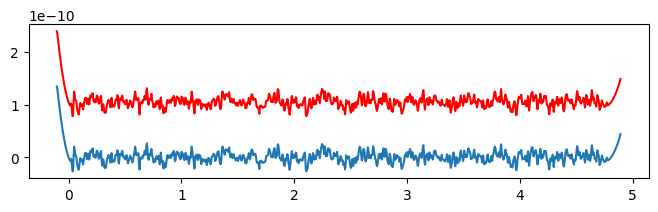

In [81]:
ideal = 410
m = measurements_0024_001[ideal]
s, force_h = force.force_hoelscher(m, calib_params_0024_001)
s, force_p = force.force_payman(m, calib_params_0024_001)

plt.figure(figsize=(8, 2))
plt.plot(s, force_h)
plt.plot(s, force_p, 'r')
plt.show()

In [16]:
%%timeit

fs = [force.force_hoelscher(m, calib_params_0024_001)[1] for m in measurements_0024_001]

100 ms ± 3.16 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [17]:
%%timeit

fs = [force.force_payman(m, calib_params_0024_001)[1] for m in measurements_0024_001]

c:\OneDrive - TU Wien\Studium\Master_5. Semester\Interdisciplinary Project\AM-AFM scripts\amafm\force.py:38: RuntimeWarning: divide by zero encountered in divide
  integrand1 = calib_params['amp_far'] / (2 * calib_params['Qfact'] * amplitude) * cos_phase
c:\OneDrive - TU Wien\Studium\Master_5. Semester\Interdisciplinary Project\AM-AFM scripts\amafm\force.py:40: RuntimeWarning: invalid value encountered in multiply
  integral1 = integrand1 * b


123 ms ± 2.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [57]:
len(force_h), len(force_p)

(1009, 1009)

In [63]:
def scale(f: np.ndarray) -> np.ndarray:
    return (f - f.min()) / (f.max() - f.min())

f = scale(force_h) - scale(force_p)
np.median(f), f

(np.float64(-9.015129490974605e-07),
 array([ 0.00000000e+00, -1.15538754e-06, -1.91162598e-06, ...,
        -1.95179450e-06, -2.09762452e-06, -1.97755766e-06]))

### Resulting force per experiment

Average curves for direction='out': 100%|██████████| 1533/1533 [00:03<00:00, 468.09it/s]


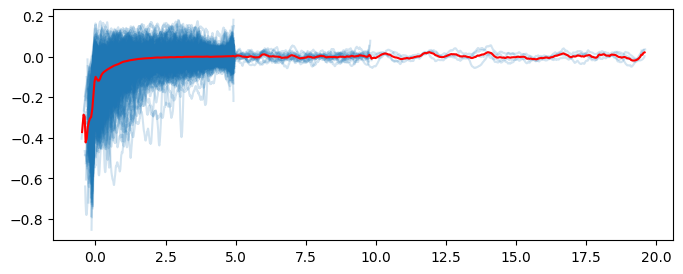

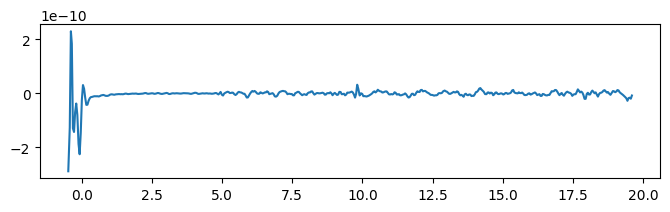

In [ ]:
avrg_measurement_0024_001 = analysis.average_curves(measurements_0024_001, n_bins=1000)
visualization.plot_averaging(avrg_measurement_0024_001, measurements_0024_001)

force_0024_001 = force.force_hoelscher(avrg_measurement_0024_001, calib_params_0024_001)
plt.figure(figsize=(8, 2))
plt.plot(*force_0024_001)
plt.show()

Average curves for direction='out': 100%|██████████| 533/533 [00:02<00:00, 229.02it/s]


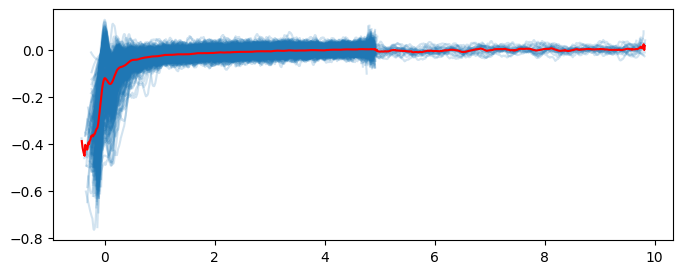

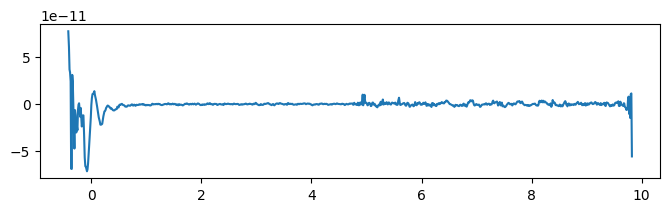

In [5]:
avrg_measurement_0026_003 = analysis.average_curves(measurements_0026_003, n_bins=1000)
visualization.plot_averaging(avrg_measurement_0026_003, measurements_0026_003)

force_0026_003 = force.force_hoelscher(avrg_measurement_0026_003, calib_params_0026_003)
plt.figure(figsize=(8, 2))
plt.plot(*force_0026_003)
plt.show()

Average curves for direction='out': 100%|██████████| 399/399 [00:01<00:00, 240.50it/s]


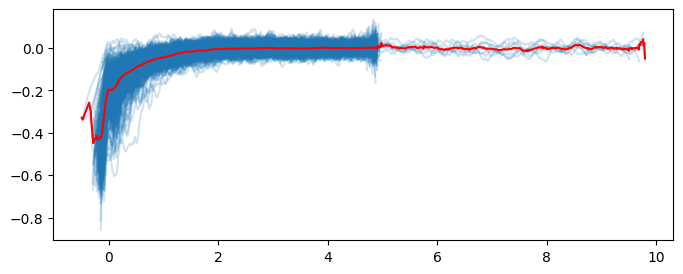

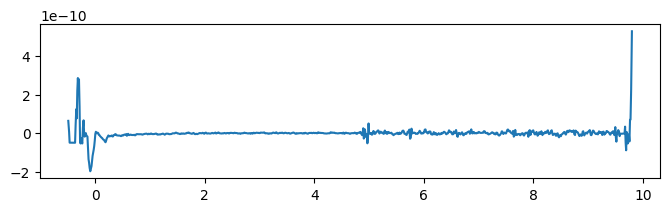

In [6]:
avrg_measurement_0031_001 = analysis.average_curves(measurements_0031_001, n_bins=1000)
visualization.plot_averaging(avrg_measurement_0031_001, measurements_0031_001)

force_0031_001 = force.force_hoelscher(avrg_measurement_0031_001, calib_params_0031_001)
plt.figure(figsize=(8, 2))
plt.plot(*force_0031_001)
plt.show()

### Compare force from average measurement to averaged forces

In [ ]:
import warnings

from typing import Literal

import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm


def average_forces(measurements: list[preprocessing.Measurement], calib_params: dict[str, float], n_bins: int = 1000, 
                   cutoff: int = 800, method: Literal['nanmean', 'nanmedian'] = 'nanmean', 
                   zscore_cutoff: float|None = None) -> tuple[np.ndarray, np.ndarray]:
    forces = np.array([[a[:cutoff] for a in force.force_hoelscher(m, calib_params)] for m in measurements])
    min_z = min([s[0] for s, _ in forces])
    max_z = max([s[-1] for s, _ in forces])
    bins_left = np.linspace(min_z, max_z, n_bins + 1)
    
    z_bins = []
    f_bins = []
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore', message=r'.*Mean of empty slice')
        for z, f in tqdm(forces):
            hist = np.histogram(z, bins=bins_left)
            idcs = np.cumulative_sum(hist[0])[:-1]
            z_bins.append(np.split(z, idcs))
            f_bins.append(np.split(f, idcs))
        z_bins = np.array([np.array(curve_bins, dtype=object) for curve_bins in z_bins]).T
        f_bins = np.array([np.array(curve_bins, dtype=object) for curve_bins in f_bins]).T
        if zscore_cutoff is not None:
            f_bins = [np.concatenate(bins) for bins in f_bins]
            f_zscore = [(f_bin - f_bin.mean()) / f_bin.std() for f_bin in f_bins]
            f_bins = [f_bin[np.abs(fz) < zscore_cutoff] for f_bin, fz in zip(f_bins, f_zscore)]
            f_av = np.array([getattr(np, method)(bins) for bins in f_bins])
        else:
            f_av = np.array([getattr(np, method)(np.concatenate(bins)) for bins in f_bins])
        z_av = np.array([getattr(np, method)(np.concatenate(bins)) for bins in z_bins])
    return z_av, f_av

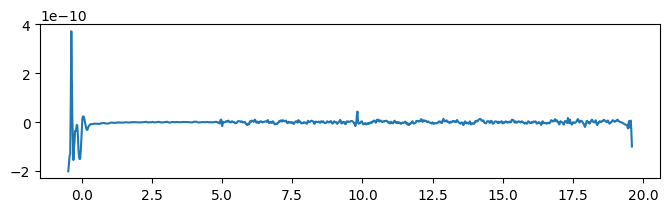

100%|██████████| 1533/1533 [00:04<00:00, 348.62it/s]


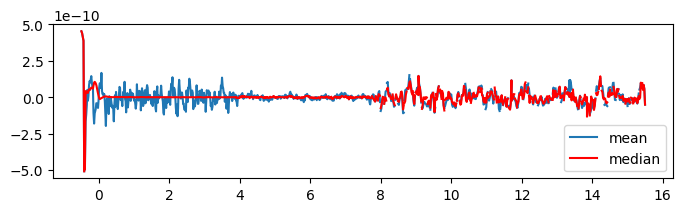

In [10]:
plt.figure(figsize=(8, 2))
plt.plot(*force_0024_001)
plt.show()

plt.figure(figsize=(8, 2))
plt.plot(*average_forces(measurements_0024_001, calib_params_0024_001, method='nanmean'), label='mean')
plt.plot(*average_forces(measurements_0024_001, calib_params_0024_001, method='nanmedian'), color='r', label='median')
plt.legend()
plt.show()

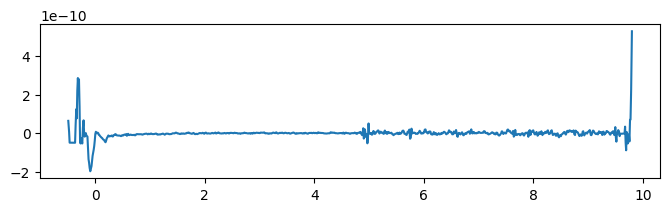

100%|██████████| 399/399 [00:01<00:00, 331.11it/s]


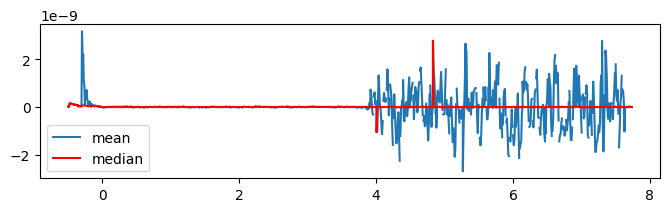

In [11]:
plt.figure(figsize=(8, 2))
plt.plot(*force_0031_001)
plt.show()

plt.figure(figsize=(8, 2))
plt.plot(*average_forces(measurements_0031_001, calib_params_0031_001, method='nanmean'), label='mean')
plt.plot(*average_forces(measurements_0031_001, calib_params_0031_001, method='nanmedian'), color='r', label='median')
plt.legend()
plt.show()

### Analyze statistics of measurements

In [ ]:
avrg_m = analysis.average_curves(measurements_0024_001, n_bins=1000)
force_0024_001 = force.force_hoelscher(avrg_m, calib_params_0024_001)

Average curves for direction='out': 100%|██████████| 1533/1533 [00:06<00:00, 236.22it/s]


100%|██████████| 1533/1533 [00:04<00:00, 359.13it/s]


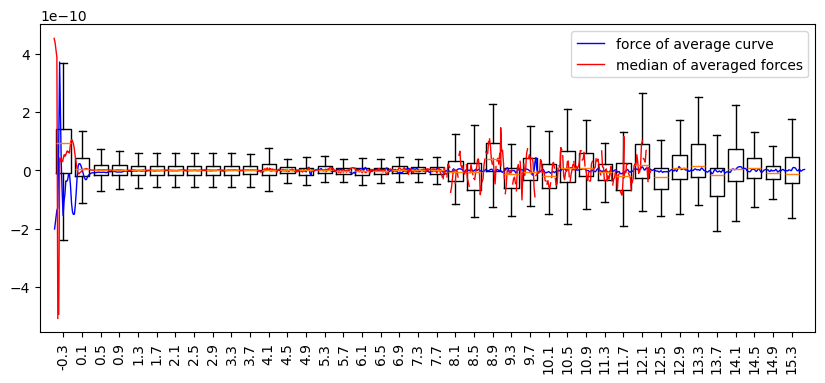

In [97]:
ms = measurements_0024_001
calib_params = calib_params_0024_001
direction = 'out'

n_bins = 40
method = 'nanmedian'
cutoff = 800
avrg_z, avrg_force = force_0024_001
avrg_z1, avrg_force1 = average_forces(ms, calib_params, cutoff=cutoff, method=method)

r_min = min([m[f'z_{direction}'][0] for m in ms])
r_max = max([m[f'z_{direction}'][:cutoff][-1] for m in ms])
box_width = (r_max - r_min) / (n_bins - 1) * 0.75

bins = np.linspace(r_min, r_max, n_bins + 1)
bins[-1] += 0.01
x_pos = ((bins[:-1] + bins[1:]) / 2)

forces = np.array([[a[:cutoff] for a in force.force_hoelscher(m, calib_params)] for m in ms])
f_bins = [np.split(f, np.cumsum(np.histogram(s, bins=bins)[0])[:-1]) for s, f in forces]
f_bins = list(map(list, zip(*f_bins)))
f_bins = [np.concatenate(f) for f in f_bins]

plt.figure(figsize=(10, 4))
plt.boxplot(f_bins, positions=x_pos, showfliers=False, widths=box_width)
plt.plot(avrg_z[:cutoff], avrg_force[:cutoff], label='force of average curve', color='b', linewidth=1)
plt.plot(avrg_z1[:cutoff], avrg_force1[:cutoff], label='median of averaged forces', color='r', linewidth=1)
plt.xticks(x_pos, x_pos.round(1), rotation=90)
plt.legend()
plt.show()

In [91]:
zscore = 2
avrg_m_zs = analysis.average_curves(measurements_0024_001, n_bins=100, zscore_cutoff=zscore)
force_0024_001_zs = force.force_hoelscher(avrg_m, calib_params_0024_001)

Average curves for direction='out': 100%|██████████| 1533/1533 [00:00<00:00, 2122.54it/s]


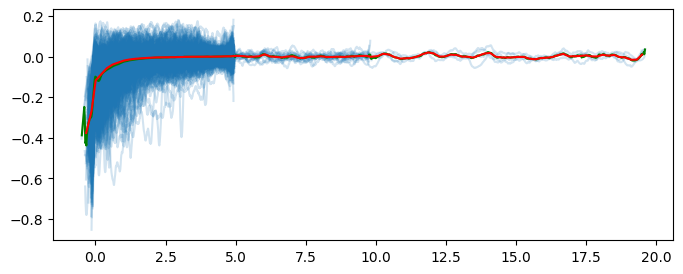

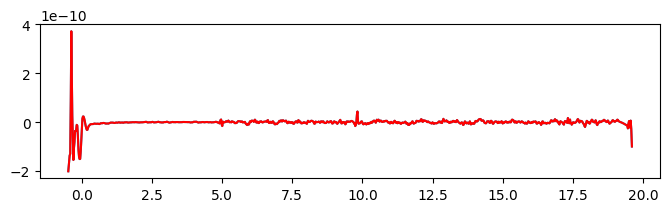

In [92]:
signal_type = 'amp'
r = slice(None)
plt.figure(figsize=(8, 3))
for m in measurements_0024_001:
    plt.plot(m[f'z_{direction}'][r], m[f'{signal_type}_{direction}'][r], color='tab:blue', alpha=0.2)
plt.plot(avrg_m[f'z_{direction}'][r], avrg_m[f'{signal_type}_{direction}'][r], color='g')
plt.plot(avrg_m_zs[f'z_{direction}'][r], avrg_m_zs[f'{signal_type}_{direction}'][r], color='r')
plt.show()

plt.figure(figsize=(8, 2))
plt.plot(*force_0024_001)
plt.plot(*force_0024_001_zs, color='r')
plt.show()

### Compare average curves with different amount of preselection

Average curves for direction='out': 100%|██████████| 1533/1533 [00:07<00:00, 218.09it/s]


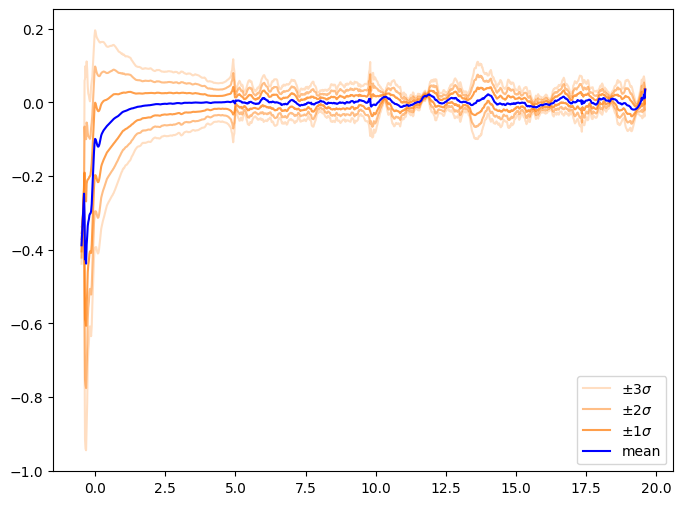

In [25]:
zscores = [1, 2, 3]
zscores = np.concatenate([zscores, np.array(zscores) * -1]).tolist()
avrg_m, zscore_ms = analysis.average_curves(measurements_0024_001, n_bins=1000, zscores=zscores)
visualization.plot_average_with_uncertainty(avrg_m, zscore_ms, zscores=zscores, direction='out', signal_type='amp')

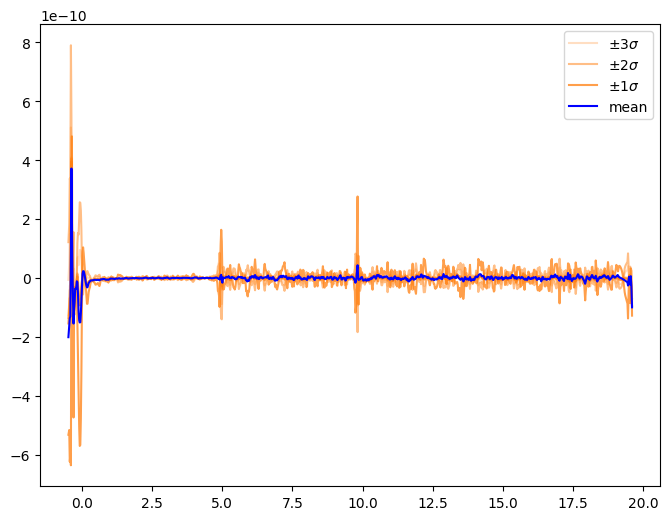

In [26]:
force_0024_001 = force.force_hoelscher(avrg_m, calib_params_0024_001)
forces_zs = [force.force_hoelscher(m, calib_params_0024_001) for m in zscore_ms]
visualization.plot_force_with_uncertainty(force_0024_001, forces_zs, zscores=zscores)

Average curves for direction='out': 100%|██████████| 1226/1226 [00:05<00:00, 209.21it/s]


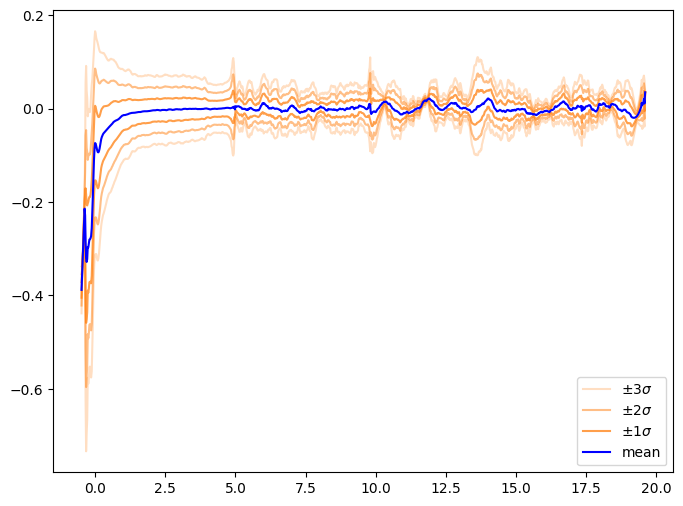

In [27]:
ideal = 410
curve_type = 'amp_out'
p_choose = 0.8
n_choose = int(len(measurements_0024_001) * p_choose)
sorted_measurements, distances, sort_idcs = selection.sort_curves_by_distance(measurements_0024_001, ideal, curve_type)
selected_measurements = sorted_measurements[:n_choose]

avrg_m, zscore_ms = analysis.average_curves(selected_measurements, n_bins=1000, zscores=zscores)
visualization.plot_average_with_uncertainty(avrg_m, zscore_ms, zscores=zscores, direction='out', signal_type='amp')

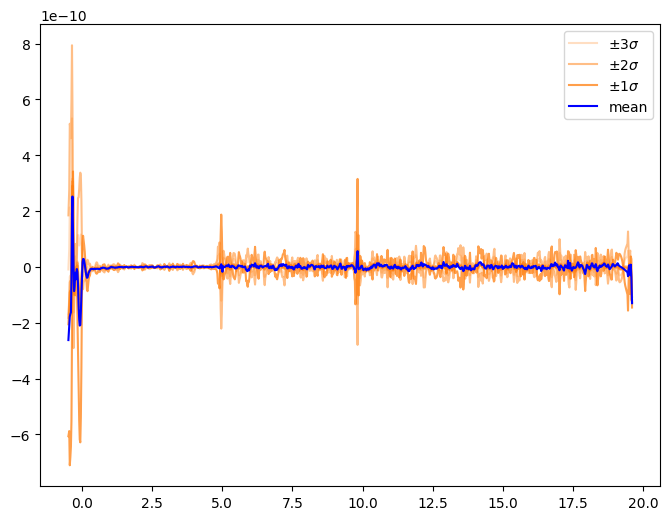

In [28]:
force_0024_001 = force.force_hoelscher(avrg_m, calib_params_0024_001)
forces_zs = [force.force_hoelscher(m, calib_params_0024_001) for m in zscore_ms]
visualization.plot_force_with_uncertainty(force_0024_001, forces_zs, zscores=zscores)

Average curves for direction='out': 100%|██████████| 766/766 [00:03<00:00, 214.89it/s]


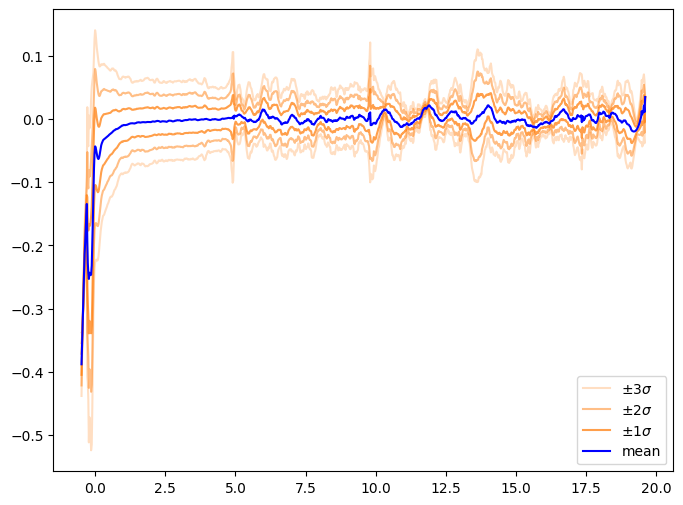

In [29]:
p_choose = 0.5
n_choose = int(len(measurements_0024_001) * p_choose)
sorted_measurements, distances, sort_idcs = selection.sort_curves_by_distance(measurements_0024_001, ideal, curve_type)
selected_measurements = sorted_measurements[:n_choose]

avrg_m, zscore_ms = analysis.average_curves(selected_measurements, n_bins=1000, zscores=zscores)
visualization.plot_average_with_uncertainty(avrg_m, zscore_ms, zscores=zscores, direction='out', signal_type='amp')

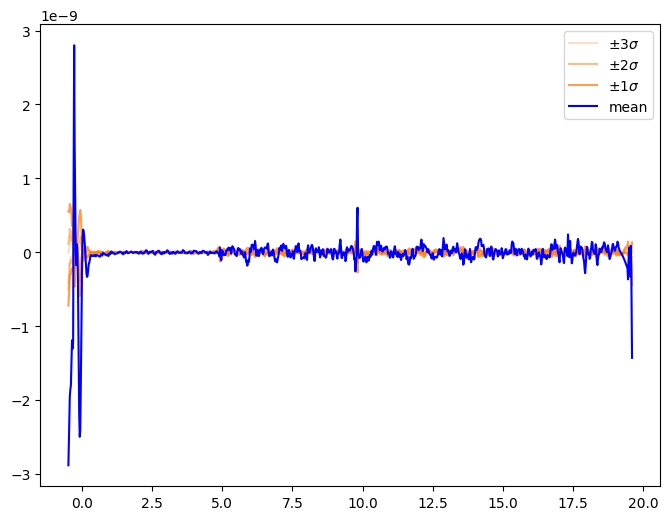

In [30]:
force_0024_001 = force.force_hoelscher(avrg_m, calib_params_0024_001)
forces_zs = [force.force_hoelscher(m, calib_params_0024_001) for m in zscore_ms]
visualization.plot_force_with_uncertainty(force_0024_001, forces_zs, zscores=zscores)

Average curves for direction='out': 100%|██████████| 200/200 [00:01<00:00, 197.03it/s]


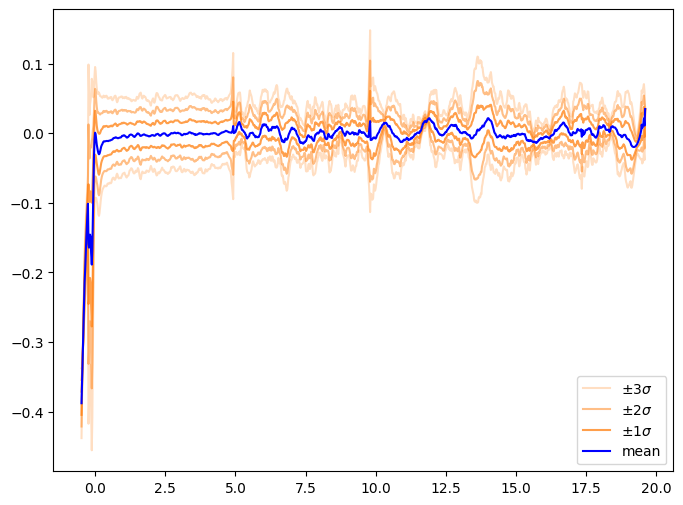

In [31]:
n_choose = 200
sorted_measurements, distances, sort_idcs = selection.sort_curves_by_distance(measurements_0024_001, ideal, curve_type)
selected_measurements = sorted_measurements[:n_choose]

avrg_m, zscore_ms = analysis.average_curves(selected_measurements, n_bins=1000, zscores=zscores)
visualization.plot_average_with_uncertainty(avrg_m, zscore_ms, zscores=zscores, direction='out', signal_type='amp')

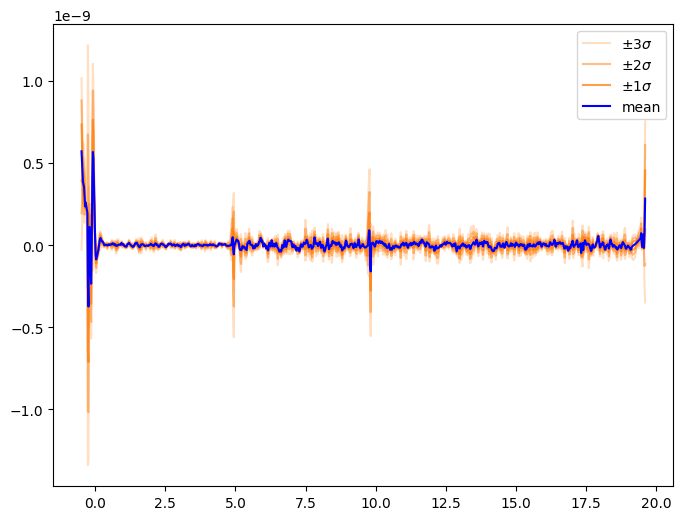

In [32]:
force_0024_001 = force.force_hoelscher(avrg_m, calib_params_0024_001)
forces_zs = [force.force_hoelscher(m, calib_params_0024_001) for m in zscore_ms]
visualization.plot_force_with_uncertainty(force_0024_001, forces_zs, zscores=zscores)

# ---